In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df = pd.read_csv('full_results.csv')

In [3]:
data = df[(df['data'] == 'mnist') | (df['data'] == 'cifar10')]

In [4]:
data.groupby('defence')['acc_on_adv']

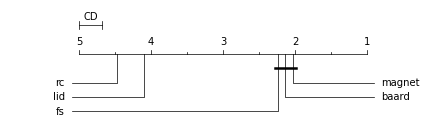

In [5]:
acc_img  = pd.concat(
    {k: g.reset_index(drop=True) for k, g in data.groupby('defence')['acc_on_adv']}, 
    axis=1)

res_acc_img = autorank(acc_img)
plot_stats(res_acc_img)
plt.savefig('nemenyi_acc_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')